In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cd /content/drive/My Drive/Data Analyst/University

/content/drive/My Drive/Data Analyst/University


In [ ]:
uni = pd.read_csv('cleaned_uni.csv')
uni.head()

,level_0,index,University_name,University_rating,Review,Rating,Time
0,0,0,Đại học Bách khoa Hà Nội,"4,6",Một chủ nhật đẹp trời tại nơi gắn bó suốt 5 nă...,4 sao,4 ngày trước
1,1,1,Đại học Bách khoa Hà Nội,"4,6","Thưa nhà trường,\n\nEm, tân sinh viên K65 của ...",1 sao,6 ngày trước
2,2,2,Đại học Bách khoa Hà Nội,"4,6","Học phí đắt,cực đắt.Tăng mạnh theo hằng năm.40...",1 sao,một tuần trước
3,3,3,Đại học Bách khoa Hà Nội,"4,6","Học phí cao, chương trình đào tạo "" Trời ơi đấ...",1 sao,một tuần trước
4,4,4,Đại học Bách khoa Hà Nội,"4,6",Khuân viên rộng rãi sạch đẹp rất nhiều cây xan...,5 sao,2 tháng trước


In [ ]:
# Drop redundant columns
uni.drop(columns=['level_0', 'index'], inplace=True)
uni.head()

,University_name,University_rating,Review,Rating,Time
0,Đại học Bách khoa Hà Nội,"4,6",Một chủ nhật đẹp trời tại nơi gắn bó suốt 5 nă...,4 sao,4 ngày trước
1,Đại học Bách khoa Hà Nội,"4,6","Thưa nhà trường,\n\nEm, tân sinh viên K65 của ...",1 sao,6 ngày trước
2,Đại học Bách khoa Hà Nội,"4,6","Học phí đắt,cực đắt.Tăng mạnh theo hằng năm.40...",1 sao,một tuần trước
3,Đại học Bách khoa Hà Nội,"4,6","Học phí cao, chương trình đào tạo "" Trời ơi đấ...",1 sao,một tuần trước
4,Đại học Bách khoa Hà Nội,"4,6",Khuân viên rộng rãi sạch đẹp rất nhiều cây xan...,5 sao,2 tháng trước


In [ ]:
remaining_cols = ['Đại học Bách khoa Hà Nội',
                  'Đại Học Kinh Tế Quốc Dân',
                  'Đại học Ngoại thương Hà Nội',
                  'Đại Học Y Hà Nội',
                  'Đại học Hà Nội',
                  'Đại học Thương mại',
                  'Đại học Sư phạm Hà Nội',
                  'Đại Học Xây Dựng',
                  'Học viện Ngân hàng',
                  'Học Viện Tài Chính',
                  'Đại Học Thủy Lợi',
                  'Đại học Thăng Long',
                  'Đại học Khoa học Tự nhiên - ĐHQGHN',
                  'Đại học Luật Hà Nội',
                  'Học viện Báo chí & Tuyên truyền',
                  'Đại học Ngoại ngữ',
                  'Đại học Khoa học Xã hội và Nhân văn - ĐHQGHN',
                  'Học Viện An ninh Nhân Dân',
                  'Đại học Dược Hà Nội',
                  'Đại Học FPT',
                  'Học viện Ngoại giao']

In [ ]:
# Drop some universities
for i in range(len(uni)):
    if uni.loc[i, 'University_name'] not in remaining_cols:
        uni.drop([i], inplace=True)
uni.reset_index(drop=True, inplace=True)

In [ ]:
uni.head()

,University_name,University_rating,Review,Rating,Time
0,Đại học Bách khoa Hà Nội,"4,6",Một chủ nhật đẹp trời tại nơi gắn bó suốt 5 nă...,4 sao,4 ngày trước
1,Đại học Bách khoa Hà Nội,"4,6","Thưa nhà trường,\n\nEm, tân sinh viên K65 của ...",1 sao,6 ngày trước
2,Đại học Bách khoa Hà Nội,"4,6","Học phí đắt,cực đắt.Tăng mạnh theo hằng năm.40...",1 sao,một tuần trước
3,Đại học Bách khoa Hà Nội,"4,6","Học phí cao, chương trình đào tạo "" Trời ơi đấ...",1 sao,một tuần trước
4,Đại học Bách khoa Hà Nội,"4,6",Khuân viên rộng rãi sạch đẹp rất nhiều cây xan...,5 sao,2 tháng trước


In [ ]:
!pip3 install vncorenlp
!mkdir -p vncorenlp/models/wordsegmenter
!wget -q --show-progress https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget -q --show-progress https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget -q --show-progress https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/ 
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  77.6MB/s    in 0.3s    
vi-vocab            100%[===================>] 514.20K  --.-KB/s    in 0.02s   
wordsegmenter.rdr   100%[===================>] 125.50K  --.-KB/s    in 0.007s  


In [ ]:
from vncorenlp import VnCoreNLP
tokenizer = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

In [ ]:
# Lowercase and remove punctuation
import string
for i in range(len(uni)):
    uni.loc[i, 'Review'] = uni.loc[i, 'Review'].lower()
    uni.loc[i, 'Review'] = uni.loc[i, 'Review'].replace('\xa0', ' ')
    uni.loc[i, 'Review'] = uni.loc[i, 'Review'].replace('…', ' ')
    uni.loc[i, 'Review'] = uni.loc[i, 'Review'].replace('시', ' ')
    
    for punc in string.punctuation:
        uni.loc[i, 'Review'] = uni.loc[i, 'Review'].replace(punc, ' ')

In [ ]:
# Tokenize reviews
for i in range(len(uni)):
    try:
        uni.loc[i, 'Review'] = tokenizer.tokenize(uni.loc[i, 'Review'])[0]
    except:
        uni.loc[i, 'Review'] = tokenizer.tokenize(uni.loc[i, 'Review'])

In [ ]:
# Gather all reviews from one university
import collections
reviews_by_uni = uni.groupby(['University_name'])['Review'].agg('sum')
all_reviews = []
for reviews in reviews_by_uni:
    all_reviews += reviews

In [ ]:
reviews_by_uni

University_name
Học Viện An ninh Nhân Dân                       [nằm, ngay, mặt, đường, chính, cổng, có, trực,...
Học Viện Tài Chính                              [học_viện, có, bền, dày, thành_tích, là, một, ...
Học viện Báo chí & Tuyên truyền                 [hvbc, tt, là, một, địa_điểm, tôi, đã, học_hàn...
Học viện Ngoại giao                             [cơ_sở, đào_tạo, đại_học, đẳng_cấp, nhất, về, ...
Học viện Ngân hàng                              [căng_tin, siêu, rộng, khá, sạch_sẽ, vì, được,...
Đại Học FPT                                     [fpt, trong, tim, người, hâm_mộ, hoà, lạc, ngà...
Đại Học Kinh Tế Quốc Dân                        [đẹp, rộng_rãi, và, thoáng, thích_hợp, đi, tập...
Đại Học Thủy Lợi                                [đằng, sau, cổng, trường, là, thiên_đường, ăn,...
Đại Học Xây Dựng                                [ngôi, trg, đào_tạo, chuyên_sâu, về, các, lĩnh...
Đại Học Y Hà Nội                                [không_gian, rộng, dãi, thoáng, mát, đây, vừa,...
Đại 

In [ ]:
for review in uni['Review'].tolist()[:5]:
    print(review)
    print('-------------------------------------------------------------')

['một', 'chủ_nhật', 'đẹp', 'trời', 'tại', 'nơi', 'gắn_bó', 'suốt', '5', 'năm']
-------------------------------------------------------------
['thưa', 'nhà_trường', 'em', 'tân', 'sinh_viên', 'k65', 'của', 'trường', 'có', 'góp_ý', 'về', 'vấn_đề', 'học_phí', 'nổi_cộm', 'trong', 'thời_gian', 'gần', 'đây', 'ạ', 'em', 'mong', 'rằng', 'quy_đổi', 'tcht', 'tchp', 'sẽ', 'được', 'loại_bỏ', 'thay', 'vào', 'đó', 'lấy', 'chính', 'tcht', 'để', 'tính', 'học_phí', 'với', 'giá_trị', 'tín_chỉ', 'tăng', 'thêm', 'tuỳ']
-------------------------------------------------------------
['học_phí', 'đắt', 'cực', 'đắt', 'tăng', 'mạnh', 'theo', 'hằng', 'năm', '40tr', 'năm', 'hệ', 'đại_trà', 'hệ', 'quốc_tế', 'nhẹ_nhàng', '80tr', 'một', 'năm', 'chỉ', 'dành', 'cho', 'con', 'nhà', 'giàu', 'rust', 'not', 'hust', 'càng_ngày_càng', 'ghét', 'trường', 'chỉ', 'mong', 'cút', 'ra', 'trường', 'sớm', 'một', 'học_phí', 'một', 'bách_khoa', 'nỗi', 'khổ', 'mang', 'tên', 'học']
--------------------------------------------------------

In [ ]:
# Import NLP tools package
import gensim.downloader as api
from gensim.corpora import Dictionary
from gensim.models import TfidfModel, LdaModel, LdaMulticore
from wordcloud import WordCloud
from collections import defaultdict

In [ ]:
list_universities = reviews_by_uni.index.tolist()
list_universities

['Học Viện An ninh Nhân Dân',
 'Học Viện Tài Chính',
 'Học viện Báo chí & Tuyên truyền',
 'Học viện Ngoại giao',
 'Học viện Ngân hàng',
 'Đại Học FPT',
 'Đại Học Kinh Tế Quốc Dân',
 'Đại Học Thủy Lợi',
 'Đại Học Xây Dựng',
 'Đại Học Y Hà Nội',
 'Đại học Bách khoa Hà Nội',
 'Đại học Dược Hà Nội',
 'Đại học Hà Nội',
 'Đại học Khoa học Tự nhiên - ĐHQGHN',
 'Đại học Khoa học Xã hội và Nhân văn - ĐHQGHN',
 'Đại học Luật Hà Nội',
 'Đại học Ngoại ngữ',
 'Đại học Ngoại thương Hà Nội',
 'Đại học Sư phạm Hà Nội',
 'Đại học Thăng Long',
 'Đại học Thương mại']

In [ ]:
# Build tf-idf model for all reviews
corpus = reviews_by_uni.tolist()
dictionary = Dictionary(corpus)
BoW_corpus = [dictionary.doc2bow(each_uni_reviews, allow_update=True) for each_uni_reviews in corpus]
tfidf = TfidfModel(BoW_corpus)

In [ ]:
# Build a wordcloud dictionary based on tf-idf
wordcloud_dict = {}
i = 0
for each_uni_reviews in tfidf[BoW_corpus]:
    wordcloud_dict[list_universities[i]] = {}
    for id, freq in each_uni_reviews:
        wordcloud_dict[list_universities[i]][dictionary[id]] = round(freq, 3)
    i += 1

In [ ]:
stopwords = ['an_ninh', 'nhân_dân', 'công_an', 'học_viện', 'chiếc', 'đào_tạo_sỹ', 'học_viên', 'bộ_môn', 'cảnh_sát', 'annd', 'vì', 'vi', 'binh', 'trần', 'công_trình_kiến',
              'toi', 'hvcs', 'hvcsnd', 'sat', 'csnd', 'toi', 'canh', 'cháu', 'tuong', 'vao', 'cam', 'viện', 'cp', 'dong', 'ffff', 'sẽ', 'thay', 'thăng', 'long', 'nguyễn', 'trãi',
              'mật_mã', 'chiến_thắng', 'tân_triều', 'quận', 'phường', 'đức', 'quyết_định', 'càng', 'cơ_mà', 'bệnh_nhân', 'bửu', 'thời_đại', 'khoa_học_tự_nhiên', 'nguyễn', 'trãi',
              'tài_chính', 'thắng', 'nông_lâm', 'hvtc', 'lê_văn_hiến', 'từ_liêm', 'mỏ', 'địa_chất', 'ngân_hàng', 'kinh_tế', 'bản_thân', 'trung_ương', 'cán_bộ_viên_chức', 'hội_đồng_chính_phủ',
              'nhạc_viện', 'âm_nhạc', 'viện', 'nhạc', 'nhac', 'am', 'viet', 'bắt_nạt', 'viện', 'thủ_tướng', 'ngõ', 'hv', 'ngõ', 'ý_tưởng', 'chữa', 'same', '9h',
              'báo_chí', 'tuyên_truyền', 'lớn_nhỏ', 'nhà_cửa', 'vietboard', 'class', 'size', 'mặc_dù', 'y_bác_sĩ', 'khám_chữa', 'vận_tải', 'cổ_đại', 'science', 'k62',
              'diplomatic', 'dav', '2tr750', '3tr350', 'ngoại_giao', 'cccc', 'chứng_minh', 'nuồn', 'dinh', 'khảng', 'io75', 'dịnh', 'daver', 'trái_tim', 'xuất_trình',
              'ngân', 'hàng', 'chùa', 'bộc', 'hvnh', 'ngan', 'nam_mô', 'hàng', 'ha`ng', 'quang', 'lĩnh', 'với_lại', 'thay_thế', 'rẽ', 'nướng', 'nhân_văn', 'đứa', 'tiếng',
              'quân_y', 'cậu', 'cx', 'cậu', 'quân', 'cầu_giấy', 'xuân', 'thủy', 'thủ_tướng', 'thịt', 'xào', 'tuyến', 'mãi', 'công_nghệ', 'khẳng_định', 'tuổi', 'kinh_doanh',
              'fpt', 'miễn_sao', 'hình_vẽ', 'fbt', 'miễn_sao', 'miễn_sao', 'viện', 'phiếu', 'hang', 'đống_đa', 'kinh', 'dương', 'giao_thông', 'gtvt', 'hậu', 'ngoại', 'gọi',
              'quốc_dân', 'ktqd', 'giải_phóng', 'hai_bà_trưng', 'kéo', 'đồng_tâm', 'bếp', 'kho', 'răng', 'trứng', 'gồm', 'lừng', 'ngoại_ngữ', 'đánh_số', 'liên', 'dịch',
              'thuỷ_lợi', 'tây_sơn', 'tài_nguyên', 'thủy', 'thuy', 'lợi', 'm2', 'thuyloi', 'trung_liệt', 'rau', 'bách', 'xây', 'công_nghiệp', 'khoa_học_xã_hội', 'đối_ngoại',
              'giầy', 'dựng', 'tỷ_phú', 'tổng_thống', 'dứng', 'ăn_mày', 'phép', 'đánh', 'xây_dựng', 'gia_sư', 'bách_khoa', 'hòm', 'gồm', 'mã', 'chữ_số', 'vnu', 'chuyển',
              'y_khoa', 'y', 'bác_sĩ', 'bác_sỹ', 'bệnh_viện', 'bệnh', 'khám', 'bệnh', 'bệnh', 'tôn_thất_tùng', 'mới_đây', 'xong', 'ban_đầu', 'ngữ', 'trường_thành_viên',
              'bách_khoa', 'kĩ_thuật', 'kỹ_thuật', 'bk', 'đhbk', 'ngành_hàng', 'kỹ_sư', 'cầu_giấy', 'nguyễn_trãi', 'km', 'trung_học', 'sen', 'phạm', 'vọng', 'chuối', 'trung_học_chuyên_nghiệp',
              'luật_sư', 'luật', 'nguyễn_chí', 'thanh', 'tư_pháp', 'quản_lý_nhà_nước', 'bộ_luật', 'trường', 'triều', 'đồng', 'đhqghn', 'sư_phạm', 'ngắn', 'be', 'ngoại_thương',
              'foreign', 'trade', 'láng', 'university', 'trực_thuộc', 'chùa', 'loại_hình', 'bộ', 'tắt', 'bộ_ngành', 'quan_hệ', 'chủ_quản', 'viết', 'thượng', 'tên', 'khối', 'thương_mại', 'quốc_tế',
              'sư_phạm', 'sp', 'thầy_cô_giáo', 'pham', 'đhsp', 'giáo', 'thuỷ', 'xuân', 'đối_với', 'nhà_giáo', 'su', 'yeu', 'thì', 'vẫn', 'thí_sinh', 'nói', 'bí_quyết', 'city', 'chở',
              'dục', 'thầy', 'thăng', 'dân_lập', 'long', 'tư_thục', 'thăng_long', 'thang_long', 'nguyễn_xiển', 'yêm', 'thang', 'tp', 'kế_hoạch', 'mô_hình', 'hien', 'triển'
              'cấp_độ', 'cơm', 'shop', 'nghia', 'ngoai', 'vì_vậy', 'ba', 'cấp_độ', 'ngu', 'lừa_đảo', 'thanh_xuân', 'mục_tiêu', 'ngữ', 'tra', 'gà', 'vịt',
              'tự_nhiên', 'national', 'giải_quyết', 'khtn', 'cấp', 'khoa_học', 'nhân_văn', 'ngày_nay', 'viết', 'university', 'sử_dụng', 'giao_dịch', 'hệ', 'vietnam',
              'lượt', 'như_chơi', 'phát', 'triển', 'vọng', 'chụp', 'nghìn', 'dục', 'google', 'thuỷ_lợi', 'tây_sơn', 'thủy', 'tài_nguyên', 'lợi', 'm2', 'thuy', 'trung_liệt', 'thuyloi',
              'thuỷ_văn', 'nông_nghiệp', 'kỹ_thuật', 'khoa_học_kỹ_thuật', 'chính_thức', 'giảm', 'liệt', 'qui_hoạch', 'thiên_tai', 'thuỷ_lực', 'thuỷ_nông', 'thuỷ_điện', 'trừơg', 'wru', 'điện_lực',
              'e4', 'ý_tưởng', 'y_tế', 'dương', 'lương_y', 'médecine', 'y_học', 'école', '’', 'viện', 'nhì', 'trung', 'bác', 'bênh', 'cán', 'cứu_chữa', 'dược',
              'gọn', 'khoa_học_ứng_dụng', 'l', 'nghề', 'nám', 'phòng_khám', 'thầy_thuốc', 'tiếp_tục', 'y_tá', 'yhn', 'tự', 'đường_trường', 'thôi_thúc',
              'cán_bộ_viên_chức', 'ngân_hàng', 'trung_ương', 'học_viên', 'bản_thân', 'cam', 'cp', 'càng', 'hội_đồng_chính_phủ', 'lê_văn_hiến', 'đức', 'thay', 'kinh_tế', 'cao_học', 'chi',
              'chính_quy', 'cơ_mà', 'da', 'dong', 'phường', 'quyết_định', 'quận', 'roi', 'tưởng', 'nha', 'nhung', 'quản_lý', 'sẽ', 'viện',
              'dịnh', 'giấy_tờ', 'io75', 'khảng', 'kv', 'luật_học', 'nuồn', 'nơ', 'nụ', 'ruộng', 'size', 'sẵn_sàng', 'thị_trường', 'tiến_triển', 'truờng', 'túc', 'tưbình', 'vietboard', 'xuất_trình', 'óc', 'ơng', 'ờm', '✊',
              '🌸', '🙈', 'chùa', 'lai', 'nhất_định', 'trai_trẻ', 'ngõ', 'cao_cấp', 'lĩnh', 'ngan', 'viện', 'hv', 'kinh_tế', 'tài_chính', 'hang', '–', 'phiếu', 'rau', 'rẽ', 'thay_thế', 'trứng', 'tuyến', 'vực',
              'với_lại', 'xào', 'học_viên', 'kinh', 'quay', 'thêm', 'đợi', 'hiệu_quả', 'mây', 'thủ_tướng', 'áp_dụng', 'nhà_nước', 'thường', 'thiêu_đốt', 'bách', 'dung',
              'báo_cáo', 'giáo_dục', 'phần_lớn', 'chuc', 'tieng'
              ]

In [ ]:
sorted = [[dictionary[id], round(freq, 2)] for id, freq in tfidf[BoW_corpus][4]]
sorted.sort(key=lambda x: x[1], reverse=True)
sorted = [couple[0] for couple in sorted[:60]]
sorted

['ngân_hàng',
 'học_viện',
 'bộc',
 'chùa',
 'ngân',
 '1998',
 'thịt',
 '09',
 '1961',
 'hvnh',
 'nam_mô',
 'quang',
 'hàng',
 'tắc',
 '12',
 '02',
 'đống_đa',
 'ngõ',
 'cao_cấp',
 'lĩnh',
 'ngan',
 'viện',
 'đếm',
 'hv',
 'kinh_tế',
 'nghiệp_vụ',
 'tài_chính',
 'hang',
 '–',
 '84',
 'phiếu',
 'rau',
 'rẽ',
 'thay_thế',
 'trứng',
 'tuyến',
 'tình_nguyện',
 'vực',
 'với_lại',
 'xào',
 'đếm_xèng',
 'học_viên',
 '1976',
 'kinh',
 'quay',
 'thêm',
 'tiền',
 'đợi',
 '1993',
 'hiệu_quả',
 'mây',
 'nữ_sinh',
 'tan_tầm',
 'thủ_tướng',
 'áp_dụng',
 'ùn_tắc',
 'cây',
 'nhà_nước',
 'thư_viện',
 'thường']

In [ ]:
# Remove stopwords from cloud
for univ in wordcloud_dict:
    keys = [*wordcloud_dict[univ]]
    for w in keys:
        if w.isnumeric():
            wordcloud_dict[univ].pop(w)

for univ in wordcloud_dict:
    for w in stopwords:
        if w in wordcloud_dict[univ]:
            wordcloud_dict[univ].pop(w)

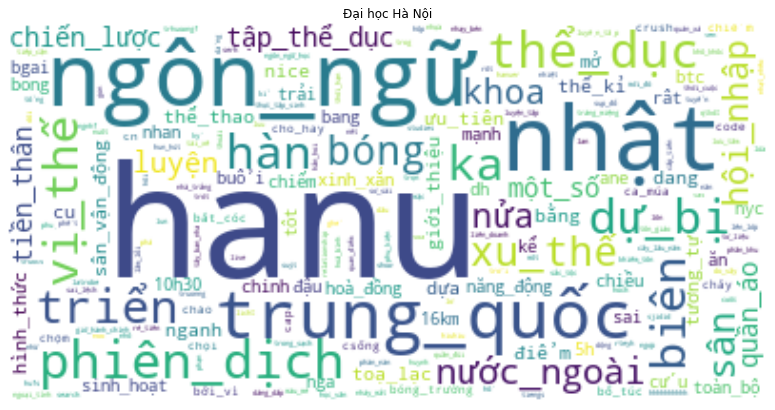

In [ ]:
# Build wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

name_uni = list_universities[12]
wordcloud = WordCloud(background_color="white", stopwords=stopwords).generate_from_frequencies(wordcloud_dict[name_uni])

plt.figure(figsize=[14,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(name_uni)
plt.show()

In [ ]:
for review in uni.loc[uni['University_name'] == list_universities[12]]['Review']:
    print(review)

In [ ]:
NUM_TOPICS = 3
ldamodel = LdaModel(tfidf[BoW_corpus], num_topics = NUM_TOPICS, id2word=dictionary)

In [ ]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.001*"ngoại_giao" + 0.001*"học_viện" + 0.000*"an_ninh" + 0.000*"báo_chí"')
(1, '0.000*"ngân_hàng" + 0.000*"dược" + 0.000*"khoa_học_tự_nhiên" + 0.000*"học_viện"')
(2, '0.001*"ngoại_ngữ" + 0.000*"fpt" + 0.000*"bách_khoa" + 0.000*"thuỷ_lợi"')


In [ ]:
!pip install pyldavis

     |████████████████████████████████| 1.6MB 15.3MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=3d2ea9ab8c919526ced6781e528c609facba494332ad826bbc716b1f398f3c69
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel, 
                              corpus=BoW_corpus, 
                              dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [ ]:
dict_topics = {}
for i in range(NUM_TOPICS):
    dict_topics[i] = []

for i in range(20):
    a_list = [list(element) for element in ldamodel[tfidf[BoW_corpus][i]]]
    a_list.sort(key = lambda x: x[1], reverse=True)
    dict_topics[a_list[0][0]].append(list_universities[i])

In [ ]:
dict_topics

{0: ['Học Viện An ninh Nhân Dân',
  'Học viện Báo chí & Tuyên truyền',
  'Học viện Ngoại giao',
  'Đại Học Kinh Tế Quốc Dân',
  'Đại Học Y Hà Nội',
  'Đại học Khoa học Xã hội và Nhân văn - ĐHQGHN',
  'Đại học Luật Hà Nội',
  'Đại học Ngoại thương Hà Nội',
  'Đại học Thăng Long'],
 1: ['Học Viện Tài Chính',
  'Học viện Ngân hàng',
  'Đại học Dược Hà Nội',
  'Đại học Khoa học Tự nhiên - ĐHQGHN',
  'Đại học Sư phạm Hà Nội'],
 2: ['Đại Học FPT',
  'Đại Học Thủy Lợi',
  'Đại Học Xây Dựng',
  'Đại học Bách khoa Hà Nội',
  'Đại học Hà Nội',
  'Đại học Ngoại ngữ']}

In [ ]:
count_uni = uni.groupby(['University_name']).count()

In [ ]:
count_hotgirl = {univ: 0 for univ in list_universities}

for i in range(len(uni)):
    for w in uni.loc[i, 'Review']:
        if w in ['nữ', 'gái', 'hotgirl', 'hot girl', 'girl', 'xinh', 'dễ_thương', 'xinh_xắn']:
            count_hotgirl[uni.loc[i, 'University_name']] += 1

for univ in count_hotgirl:
    count_hotgirl[univ] = count_hotgirl[univ]/count_uni.loc[univ, 'University_rating']

In [ ]:
count_hotgirl = pd.DataFrame.from_dict(count_hotgirl, orient='index', columns=['Rate']).sort_values(by=['Rate'], ascending=False)

In [ ]:
count_hotgirl

,Rate
Đại học Ngoại thương Hà Nội,0.044207
Học Viện Tài Chính,0.040284
Đại học Thương mại,0.035865
Đại học Thăng Long,0.034783
Đại học Ngoại ngữ,0.034091
Học viện Ngân hàng,0.032680
Đại học Hà Nội,0.031936
Đại Học Kinh Tế Quốc Dân,0.022760
Đại học Khoa học Xã hội và Nhân văn - ĐHQGHN,0.020000
Đại học Sư phạm Hà Nội,0.019027


<Figure size 1440x2880 with 0 Axes>

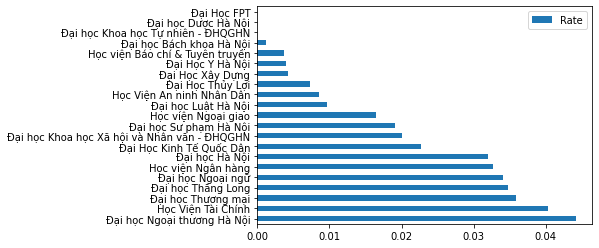

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 40))
count_hotgirl.plot.barh()
plt.show()